Con Verlet se calculan las órbitas de manera eficiente pero uno quiere más información, por ejemplo verificar que la energía es constante en el tiempo. Para ello es útil resolver también las velocidades. El algoritmo de Runge-Kutta nos permite hacerlo planteándo a nuestro sistema:


$$ \tilde{x}'' = -\dfrac{\tilde{x}}{\tilde{r}^3} = S_x(\tilde{x},\tilde{y}) $$
$$ \tilde{y}'' = -\dfrac{\tilde{y}}{\tilde{r}^3} = S_y(\tilde{x},\tilde{y}) $$

como un sistema de primer orden de cuatro ecuaciones:

$ x' = v_x $

$ v_x' = -\dfrac{x}{r^3} = S_x(x,y) $

$ y' = v_y $

$ v_y' = -\dfrac{y}{r^3} = S_y(x,y) $

$$ (x',v_x',y',v_y') = (v_x,-\dfrac{x}{r^3},v_y,-\dfrac{y}{r^3}) = S(x,v_x,y,v_y) $$

Por otro lado, la energía la calculamos de la siguiente manera:

$$ E = \dfrac{1}{2}m(v_x^2 + v_y^2) - \dfrac{GMm}{\sqrt{x^2+y^2}} $$

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------#
#---Parámetros físicos y condiciones iniciales---#
#------------------------------------------------#
G = 6.674 * 10**(-11) # Constante de Gravitación Universal
M = 1.989 * 10**30 # La masota del cuerpo grandote.
m = 5.972 * 10**24 # La masita del cuerpo que orbita
p0 = 1.496*10**(11) # Posición inicial física. Que coincide con x_0. Una unidad astronómica.

# Velocidades iniciales en SI. En general ambas son distintas de cero.
# Para la tierra considera directamente que la v0_x = 0
v0_x = 0.0
v0_y = 30000

v0 = sqrt(v0_x**2 + v0_y**2)
#sqrt(2*G*M/p0) #(Parábola) #30000 (Velocidad de la Tierra)
print("Velocidad inicial en SI: ", v0)

# Tiempo final considerando 365 días
print("Tiempo Adiomensional sugerido: ", sqrt((G*M)/p0**3)*(3.154*10**(7)))
E0 = 0.5*m*v0**2 - (G*M*m)/p0

print("Energía Inicial en Joules: ", E0)

Velocidad inicial en SI:  30000.0
Tiempo Adiomensional sugerido:  6.280219042890066
Energía Inicial en Joules:  -2.6117863363636366e+33


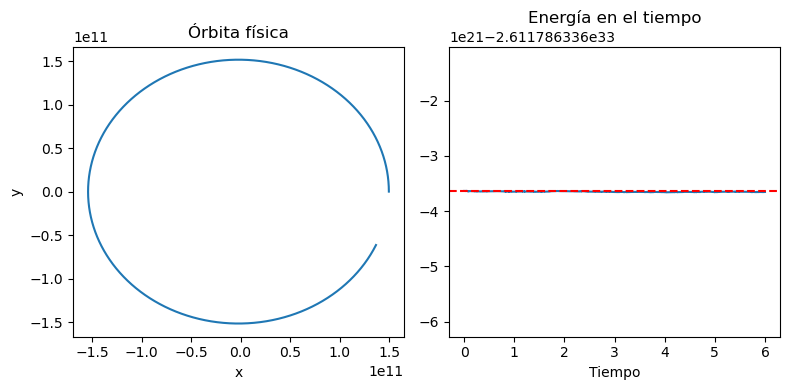

6001


In [2]:
#--------------------------------------------#
#---Las Ecuaciones y sus Valores Iniciales---#
#--------------------------------------------#

def S(x, vx, y, vy):
    r = np.sqrt(x**2 + y**2)
    return np.array([vx, -x/(r**3), vy, -y/(r**3)])
    
# Posiciones iniciales al tiempo inicial
t0 = 0.0
x0 = 1.0
y0 = 0.0

# Velocidades iniciales
vx0 = sqrt(p0/(G*M))*v0_x
vy0 = sqrt(p0/(G*M))*v0_y

#-------------#
#---Dominio---#
#-------------#

tf = 6 # Duración de la solución
h = 0.001
N = int(tf/h) # Número de pasos temporales

Tiempo = [t0]
X = [x0]
Vx = [vx0]
Y = [y0]
Vy = [vy0]

for n in range(N):
    t = t0 + n * h
    k1 = h * S(X[-1], Vx[-1], Y[-1], Vy[-1])
    k2 = h * S(X[-1] + 0.5 * k1[0], Vx[-1] + 0.5 * k1[1], Y[-1] + 0.5 * k1[2], Vy[-1] + 0.5 * k1[3])
    k3 = h * S(X[-1] + 0.5 * k2[0], Vx[-1] + 0.5 * k2[1], Y[-1] + 0.5 * k2[2], Vy[-1] + 0.5 * k2[3])
    k4 = h * S(X[-1] + k3[0], Vx[-1] + k3[1], Y[-1] + k3[2], Vy[-1] + k3[3])
    
    X.append(X[-1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6)
    Vx.append(Vx[-1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6)
    Y.append(Y[-1] + (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])/6)
    Vy.append(Vy[-1] + (k1[3] + 2*k2[3] + 2*k3[3] + k4[3])/6)
    Tiempo.append(t + h)

# Energía adimensional
Energia_adimensional = [m*(0.5*(vx**2 + vy**2) - 1/sqrt(x**2 + y**2)) for vx, vy, x, y in zip(Vx, Vy, X, Y)]

#-----------------------------------------------#
#---Recuperamos las cantidades en unidades SI---#
#-----------------------------------------------#
X_real = [p0*i for i in X]
Y_real = [p0*i for i in Y]

Energia = [(G*M/p0)*e for e in Energia_adimensional]
#---------------------------------------------------------------------------------------------------------------
#                                           |
#                                           |
#                 .''.         .''. `._    _|_    _.' .''.         .''.
#                  '. '.     .' .'     ~-./ _ \.-~     '. '.     .' .'
#  ____              '. '._.' .'         /_/_\_\         '. '._.' .'               ____
# '.__ ~~~~-----......-'.' '.'`~-.____.-~       ~-..____.-~'.' '.'`-......-----~~~~ __.'
#     ~~~~----....__//.''._.'.\\\                       ///.'._.''.\\___....----~~~~
#                   .' .'__'. '._..__   GRAFIACION  __.._.' .'__'. '.
#                 .' .'||    '. '.   ~-.._______..-~   .' .'    ||'. '.
#                '.,'  ||-.    ',.'        |_|        '.,'    .-||  ',.'
#                      \| |                .'.                | |/
#                       | |                | |                | |
#                       '.'                '.'                '.'
#---------------------------------------------------------------------------------------------

plt.figure(figsize=(8, 4))

# Subgráfica 1: Órbita
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera subgráfica
plt.plot(X_real, Y_real)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita física')

# Subgráfica 2: Energía vs Tiempo
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segunda subgráfica
plt.plot(Tiempo, Energia)
plt.axhline(y = E0, color='r', linestyle='--', label='$E_0$')
plt.xlabel('Tiempo')
plt.title('Energía en el tiempo')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

print(len(X_real))